# LightGBM 原生接口

重要参数
```
boosting / boost / boosting_type
用于指定弱学习器的类型，默认值为 ‘gbdt’，表示使用基于树的模型进行计算。还可以选择为 ‘gblinear’ 表示使用线性模型作为弱学习器。
可选的参数值有：
‘gbdt’，使用梯度提升树
‘rf’，使用随机森林
‘dart’，不太了解，官方解释为 Dropouts meet Multiple Additive Regression Trees
‘goss’，使用单边梯度抽样算法，速度很快，但是可能欠拟合。
推荐设置为 'gbdt’

objective / application
用于指定学习任务及相应的学习目标，常用的可选参数值如下：
“regression”，使用L2正则项的回归模型（默认值）。
“regression_l1”，使用L1正则项的回归模型。
“mape”，平均绝对百分比误差。
“binary”，二分类。
“multiclass”，多分类。

num_class
用于设置多分类问题的类别个数。

min_child_samples
叶节点样本的最少数量，默认值20，用于防止过拟合。

learning_rate / eta
LightGBM 不完全信任每个弱学习器学到的残差值，为此需要给每个弱学习器拟合的残差值都乘上取值范围在(0, 1] 的 eta，设置较小的 eta 就可以多学习几个弱学习器来弥补不足的残差。
推荐的候选值为：[0.01, 0.015, 0.025, 0.05, 0.1]

max_depth
指定树的最大深度，默认值为-1，表示不做限制，合理的设置可以防止过拟合。
推荐的数值为：[3, 5, 6, 7, 9, 12, 15, 17, 25]。

num_leaves
指定叶子的个数，默认值为31，此参数的数值应该小于 2 m a x _ d e p t h 2^{max\_depth}2 
max_depth
 。

feature_fraction / colsample_bytree
构建弱学习器时，对特征随机采样的比例，默认值为1。
推荐的候选值为：[0.6, 0.7, 0.8, 0.9, 1]

bagging_fraction / subsample
默认值1，指定采样出 subsample * n_samples 个样本用于训练弱学习器。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。 取值在(0, 1)之间，设置为1表示使用所有数据训练弱学习器。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。
注意： bagging_freq 设置为非0值时才生效。
推荐的候选值为：[0.6, 0.7, 0.8, 0.9, 1]

bagging_freq / subsample_freq
数值型，默认值0，表示禁用样本采样。如果设置为整数 z ，则每迭代 k 次执行一次采样。

lambda_l1
L1正则化权重项，增加此值将使模型更加保守。
推荐的候选值为：[0, 0.01~0.1, 1]

lambda_l2
L2正则化权重项，增加此值将使模型更加保守。
推荐的候选值为：[0, 0.1, 0.5, 1]

min_gain_to_split / min_split_gain
指定叶节点进行分支所需的损失减少的最小值，默认值为0。设置的值越大，模型就越保守。
推荐的候选值为：[0, 0.05 ~ 0.1, 0.3, 0.5, 0.7, 0.9, 1]

min_sum_hessian_in_leaf / min_child_weight
指定孩子节点中最小的样本权重和，如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束，默认值为1。
推荐的候选值为：[1, 3, 5, 7]

metric
用于指定评估指标，可以传递各种评估方法组成的list。常用的评估指标如下：
‘mae’，用于回归任务，效果与 ‘mean_absolute_error’， ‘l1’ 相同。
‘mse’，用于回归任务，效果与 ‘mean_squared_error’， ‘l2’ 相同。
‘rmse’，用于回归任务，效果与 ‘root_mean_squared_error’， ‘l2_root’ 相同。
‘auc’，用于二分类任务。
‘binary’，用于二分类任务。
‘binary_logloss’，用于二分类任务。
‘binary_error’，用于二分类任务。
‘multiclass’，用于多分类。
‘multi_logloss’， 用于多分类。
‘multi_error’， 用于多分类。

seed / random_state
指定随机数种子。
```


训练参数
```
以lightgbm.train为主，参数及默认值如下：

lightgbm.train(params, train_set, num_boost_round=100, valid_sets=None, valid_names=None, fobj=None, feval=None, init_model=None, feature_name='auto', categorical_feature='auto', early_stopping_rounds=None, evals_result=None, verbose_eval=True, learning_rates=None, keep_training_booster=False, callbacks=None)

1，params
字典类型，用于指定各种参数，例如：{‘booster’:‘gbtree’,‘eta’:0.1}

2，train_set
用于训练的数据，通过给下面的方法传递数据和标签来构造：
train_data = lgb.Dataset(train_x, train_y)

3，num_boost_round
指定最大迭代次数，默认值为10

4，valid_sets
列表类型，用于指定训练过程中用于评估的数据及数据的名称。例如：[train_data, valid_data]
train_data = lgb.Dataset(train_x, train_y)
valid_data = lgb.Dataset(valid_x, valid_y, reference=train)

5，fobj
可以指定二阶可导的自定义目标函数。

6，feval
自定义评估函数。

7，categorical_feature
指定哪些是类别特征。

8，early_stopping_rounds
指定迭代多少次没有得到优化则停止训练，默认值为None，表示不提前停止训练。
注意：valid_sets 必须非空才能生效，如果有多个数据集，则以最后一个数据集为准。

9，verbose_eval
可以是bool类型，也可以是整数类型。如果设置为整数，则每间隔verbose_eval次迭代就输出一次信息。

10，init_model
加载之前训练好的 lgb 模型，用于增量训练。
```

预测方法
```
predict(data, num_iteration=None)
1
参数说明：

data：string, numpy array, pandas DataFrame
num_iteration：选择第几次迭代用于预测，如果使用了 early_stopping_rounds，那么最佳的一次迭代将被使用
注意，对于分类问题，predict 方法返回的是属于各个类别的概率，需要执行下面的语句才能获取到预测的类别：

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
```

绘制特征重要性
```
from lightgbm import plot_importance
# 显示重要特征，max_num_features 指定显示多少个特征
plot_importance(lgb_model, max_num_features)
plt.show()
```

分类例子

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Info] Start training from score -1.026292
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.176574

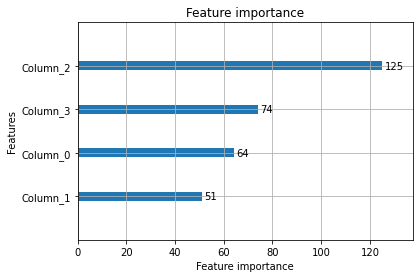

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import lightgbm as lgb
from lightgbm import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
X,y = iris.data,iris.target
# 数据集分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123457)

# 参数
params = {
        'booster': 'gbtree',
        'objective': 'multiclass',
        'num_class': 3,
        'num_leaves': 31,
        'subsample': 0.8,
        'bagging_freq': 1,
        'feature_fraction ': 0.8,
        'slient': 1,
        'learning_rate ': 0.01,
        'seed': 0
}

# 构造训练集
dtrain = lgb.Dataset(X_train,y_train)
dtest = lgb.Dataset(X_test,y_test)
num_rounds = 500
# xgboost模型训练
model = lgb.train(params,dtrain, num_rounds, 
                  valid_sets=[dtrain, dtest], 
                  verbose_eval=100, 
                  early_stopping_rounds=100)

# 对测试集进行预测
y_pred = model.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
print('accuarcy:%.2f%%'%(accuracy*100))

# 显示重要特征
plot_importance(model)
plt.show()


回归例子

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targe

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Info] Start training from score 22.611881
[LightGBM] [Warning] No further splits w

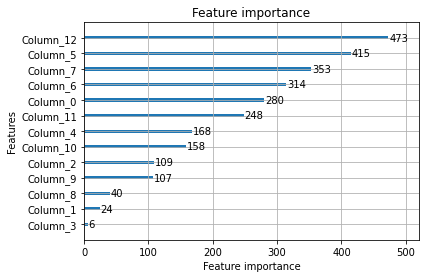

In [3]:
from sklearn.datasets import load_boston
import lightgbm as lgb
from lightgbm import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 加载波士顿房价预测数据集
boston = load_boston()
X,y = boston.data,boston.target

# 数据集分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

params = {
    'booster': 'gbtree',
    'objective': 'regression',
    'num_leaves': 31,
    'subsample': 0.8,
    'bagging_freq': 1,
    'feature_fraction ': 0.8,
    'slient': 1,
    'learning_rate ': 0.01,
    'seed': 0
}


# 构造训练集
dtrain = lgb.Dataset(X_train,y_train)
dtest = lgb.Dataset(X_test,y_test)
num_rounds = 500
# xgboost模型训练
model = lgb.train(params,dtrain, num_rounds, valid_sets=[dtrain, dtest], 
                  verbose_eval=100, early_stopping_rounds=100)

# 对测试集进行预测
y_pred = model.predict(X_test)
print('mse:', mean_squared_error(y_test, y_pred))

# 显示重要特征
plot_importance(model)
plt.show()


# LightGBM 的 sklearn 风格接口

LGBMClassifier基本使用

In [ ]:
from lightgbm import LGBMClassifier
# 重要参数：
lgb_model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary', # 默认是二分类
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

lgb_model.fit(
    X, # array, DataFrame 类型
    y, # array, Series 类型
    eval_set=None, # 用于评估的数据集，例如：[(X_train, y_train), (X_test, y_test)]
    eval_metric=None, # 评估函数，字符串类型，例如：'l2', 'logloss'
    early_stopping_rounds=None, 
    verbose=True # 设置为正整数表示间隔多少次迭代输出一次信息
)

lgb_model.predict(data) # 返回预测值
lgb_model.predict_proba(data) # 返回各个样本属于各个类别的概率

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: booster
accuracy: 97%


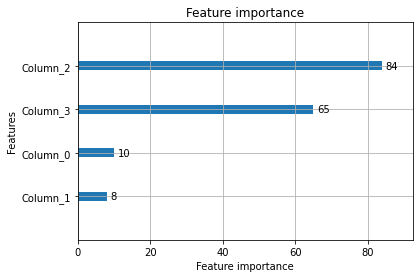

In [4]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from lightgbm import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12343)

model = LGBMClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200, # 使用多少个弱分类器
    objective='multiclass',
    num_class=3,
    booster='gbtree',
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    seed=0 # 随机数种子
)
model.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
          verbose=100, early_stopping_rounds=50)

# 对测试集进行预测
y_pred = model.predict(X_test)
model.predict_proba
#计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:%3.f%%'%(accuracy*100))

# 显示重要特征
plot_importance(model)
plt.show()


LGBMRegressor基本使用

In [ ]:
from lightgbm import LGBMRegressor
# 重要参数：
lgb_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    objective='regression', # 默认是二分类
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

from lightgbm import LGBMRegressor
from lightgbm import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# 导入数据集
boston = load_boston()
X ,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    objective='regression', # 默认是二分类
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

model.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
          verbose=100, early_stopping_rounds=50)

# 对测试集进行预测
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('mse', mse)

# 显示重要特征
plot_importance(model)
plt.show()


# LightGBM 调参思路
```
(1）选择较高的学习率，例如0.1，这样可以减少迭代用时。

（2）然后对 max_depth, num_leaves, min_data_in_leaf, min_split_gain, subsample, colsample_bytree 这些参数进行调整。

其中，num_leaves < 2 m a x _ d e p t h 2^{max\_depth}2 max_depth。
而 min_data_in_leaf 是一个很重要的参数, 也叫min_child_samples，它的值取决于训练数据的样本个树和num_leaves. 将其设置的较大可以避免生成一个过深的树, 但有可能导致欠拟合。

其他参数的合适候选值为：
max_depth：[3, 5, 6, 7, 9, 12, 15, 17, 25]
min_split_gain：[0, 0.05 ~ 0.1, 0.3, 0.5, 0.7, 0.9, 1]
subsample：[0.6, 0.7, 0.8, 0.9, 1]
colsample_bytree：[0.6, 0.7, 0.8, 0.9, 1]

（3）调整正则化参数 reg_lambda , reg_alpha，这些参数的合适候选值为：
reg_alpha：[0, 0.01~0.1, 1]
reg_lambda ：[0, 0.1, 0.5, 1]

（4）降低学习率，继续调整参数，学习率合适候选值为：[0.01, 0.015, 0.025, 0.05, 0.1]
```

# 参数网格搜索

In [ ]:
from sklearn.datasets import load_iris
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV  # Perforing grid search
from sklearn.model_selection import train_test_split

# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12343)
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.333, random_state=0)   # 分训练集和验证集
train = lgb.Dataset(train_x, train_y)
valid = lgb.Dataset(valid_x, valid_y, reference=train)


parameters = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
gbm = LGBMClassifier(max_depth=3,
                    learning_rate=0.1,
                    n_estimators=200, # 使用多少个弱分类器
                    objective='multiclass',
                    num_class=3,
                    booster='gbtree',
                    min_child_weight=2,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    reg_alpha=0,
                    reg_lambda=1,
                    seed=0 # 随机数种子
                )
# 有了gridsearch我们便不需要fit函数
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(train_x, train_y)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


xgboost和lightgbm的区别和适用场景
```
xgboost和lightgbm的区别和适用场景

参考回答:

（1）xgboost采用的是level-wise的分裂策略，而lightGBM采用了leaf-wise的策略，区别是xgboost对每一层所有节点做无差别分裂，可能有些节点的增益非常小，对结果影响不大，但是xgboost也进行了分裂，带来了务必要的开销。 leaft-wise的做法是在当前所有叶子节点中选择分裂收益最大的节点进行分裂，如此递归进行，很明显leaf-wise这种做法容易过拟合，因为容易陷入比较高的深度中，因此需要对最大深度做限制，从而避免过拟合。
（2）lightgbm使用了基于histogram的决策树算法，这一点不同与xgboost中的 exact 算法，histogram算法在内存和计算代价上都有不小优势。1）内存上优势：很明显，直方图算法的内存消耗为(#data* #features * 1Bytes)(因为对特征分桶后只需保存特征离散化之后的值)，而xgboost的exact算法内存消耗为：(2 * #data * #features* 4Bytes)，因为xgboost既要保存原始feature的值，也要保存这个值的顺序索引，这些值需要32位的浮点数来保存。2）计算上的优势，预排序算法在选择好分裂特征计算分裂收益时需要遍历所有样本的特征值，时间为(#data),而直方图算法只需要遍历桶就行了，时间为(#bin)

（3）直方图做差加速，一个子节点的直方图可以通过父节点的直方图减去兄弟节点的直方图得到，从而加速计算。

（4）lightgbm支持直接输入categorical 的feature，在对离散特征分裂时，每个取值都当作一个桶，分裂时的增益算的是”是否属于某个category“的gain。类似于one-hot编码。

（5）xgboost在每一层都动态构建直方图，因为xgboost的直方图算法不是针对某个特定的feature，而是所有feature共享一个直方图(每个样本的权重是二阶导),所以每一层都要重新构建直方图，而lightgbm中对每个特征都有一个直方图，所以构建一次直方图就够了。

其适用场景根据实际项目和两种算法的优点进行选择。
```